In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

... resuming from 344981504 bytes (506595185 bytes left) ...
 98% 797M/812M [00:03<00:00, 136MB/s]
100% 812M/812M [00:03<00:00, 134MB/s]


In [ ]:
import os
import cv2
import numpy as np
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten, Dropout

In [ ]:
# Extract dataset
!unzip -q dogs-vs-cats.zip
with ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/train/')
    print('Dataset extracted successfully.')



yes
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test1.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
yes
Dataset extracted successfully.


In [ ]:
images = []
labels = []
def load_data():
    data_dir = '/content/train/train/train'

In [ ]:
def load_data():
    data_dir = '/content/train/train/train'
    for filename in os.listdir(data_dir):
        label = 1 if 'dog' in filename else 0
        img_path = os.path.join(data_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:  # Check if the image was loaded successfully
            img = cv2.resize(img, (64, 64))
            images.append(img)
            labels.append(label)
        else:
            print(f"Error loading image: {img_path}")
    return np.array(images), np.array(labels)

images, labels = load_data()
images = images.astype('float32') / 255.0

In [ ]:
if len(images) == 0:
    print("No images found in the directory:", '/content/train/train/train')
else:
    print("Number of images loaded:", len(images))

Number of images loaded: 25000


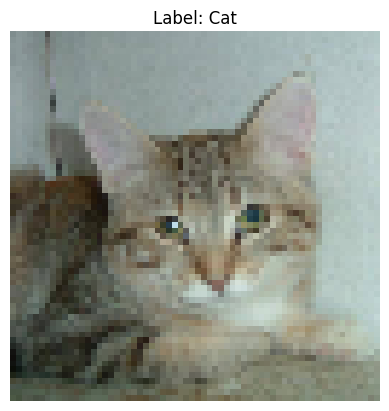

In [ ]:

    index = random.randint(0, len(images)-1)
    plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
    plt.title('Label: ' + ('Dog' if labels[index] == 1 else 'Cat'))
    plt.axis('off')
    plt.show()

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_CHANNELS=3
from keras import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation,Dense, Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
    Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_16 (Ba  (None, 62, 62, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_17 (Ba  (None, 29, 29, 64)       

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


yes


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val),
                     callbacks=[early_stopping])

Epoch 1/10
547/547 [==============================] - 17s 14ms/step - loss: 0.6991 - accuracy: 0.6543 - val_loss: 0.5850 - val_accuracy: 0.6883
Epoch 2/10
547/547 [==============================] - 7s 13ms/step - loss: 0.5264 - accuracy: 0.7367 - val_loss: 0.9587 - val_accuracy: 0.5803
Epoch 3/10
547/547 [==============================] - 6s 11ms/step - loss: 0.4692 - accuracy: 0.7740 - val_loss: 0.5507 - val_accuracy: 0.7232
Epoch 4/10
547/547 [==============================] - 7s 12ms/step - loss: 0.4256 - accuracy: 0.8015 - val_loss: 0.4449 - val_accuracy: 0.8016
Epoch 5/10
547/547 [==============================] - 6s 12ms/step - loss: 0.3920 - accuracy: 0.8244 - val_loss: 0.4985 - val_accuracy: 0.7720
Epoch 6/10
547/547 [==============================] - 7s 12ms/step - loss: 0.3657 - accuracy: 0.8345 - val_loss: 0.5581 - val_accuracy: 0.7627
Epoch 7/10
547/547 [==============================] - 6s 12ms/step - loss: 0.3447 - accuracy: 0.8463 - val_loss: 0.3990 - val_accuracy: 0.819

In [ ]:
loss, accuracy, = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


118/118 [==============================] - 1s 5ms/step - loss: 0.3311 - accuracy: 0.8517
Test Loss: 0.33112865686416626
Test Accuracy: 0.8517333269119263


<Figure size 640x480 with 0 Axes>

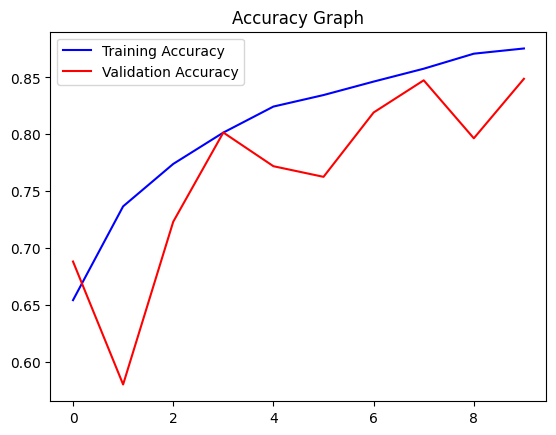

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()